In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
from collections import Counter
#help(ta)

In [2]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")
#df['comment_focus_type']

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
0,General comment threads about individual subjects,192,Notes,Can't tell what the red/brown blob on the righ...,2015-11-09 20:50:03.309,1071522.0,Subject,33075,1396273,Sprixie,16496,Subject 1071522
1,General comment threads about individual subjects,192,Notes,"yes i agree, judging by the rough edges round ...",2015-11-10 17:11:02.277,1071522.0,Subject,33406,1813,hightower73,16496,Subject 1071522
2,"Ask us about specific manuscripts, scripts, ha...",195,Questions for the research team,There are only a few documents displaying in t...,2015-11-14 00:41:28.637,NaN,None,34596,1372521,Judy_Prouty,17263,Is this project proceeding?
3,General comment threads about individual subjects,192,Notes,Nothing on here?,2015-11-27 10:39:56.197,1167235.0,Subject,38341,478315,darktruth,19021,Subject 1167235
4,General comment threads about individual subjects,192,Notes,No text or image.,2015-11-27 10:42:46.044,1169357.0,Subject,38342,478315,darktruth,19022,Subject 1169357


In [3]:
hashtags = []

for row in df.iterrows():
    match = re.findall(r'\#[a-zA-Z0-9_-]+', row[1][3], re.IGNORECASE)
    for m in match:
        if m == "#v": # Note #v is a false positive genereated by google books links
            continue
        else:
            hashtags.append(m.lower())
print("Total number of hashtags: " + str(len(hashtags)))
print("Unique hashtags: " + str(len(set(hashtags))))

Total number of hashtags: 4058
Unique hashtags: 963


In [4]:
ta.CoreSet.vis("#OED", df, excludeusers=["Cuboctahedron"])

Wrote 164 interactions for hashtag #oed as oed.html


In [5]:
# This creates the Vis timeline with javascrip for 20 most common hashtags
c = Counter(hashtags)
counter = 0
for hashtag in c.most_common(20):
    counter += 1
    print(counter)
    ta.CoreSet.vis(hashtag[0], df)

1
Wrote 261 interactions for hashtag #letter as letter.html
2
Wrote 166 interactions for hashtag #oed as oed.html
3
Wrote 188 interactions for hashtag #recipe as recipe.html
4
Wrote 123 interactions for hashtag #medicine as medicine.html
5
Wrote 101 interactions for hashtag #latin as latin.html
6
Wrote 93 interactions for hashtag #womanwriter as womanwriter.html
7
Wrote 95 interactions for hashtag #catholic as catholic.html
8
Wrote 118 interactions for hashtag #copiedletter as copiedletter.html
9
Wrote 69 interactions for hashtag #address as address.html
10
Wrote 49 interactions for hashtag #medical as medical.html
11
Wrote 32 interactions for hashtag #cooking as cooking.html
12
Wrote 20 interactions for hashtag #bleedthrough as bleedthrough.html
13
Wrote 11 interactions for hashtag #ward as ward.html
14
Wrote 42 interactions for hashtag #paper as paper.html
15
Wrote 47 interactions for hashtag #packe as packe.html
16
Wrote 4 interactions for hashtag #baker as baker.html
17
Wrote 4 int

In [6]:
'''Get most common hashtags'''
c = Counter(hashtags)
c.most_common(20)

[('#letter', 302),
 ('#oed', 237),
 ('#recipe', 222),
 ('#medicine', 162),
 ('#latin', 143),
 ('#womanwriter', 139),
 ('#catholic', 129),
 ('#copiedletter', 120),
 ('#address', 79),
 ('#medical', 64),
 ('#cooking', 59),
 ('#bleedthrough', 58),
 ('#ward', 58),
 ('#paper', 54),
 ('#packe', 50),
 ('#baker', 45),
 ('#cromwell', 35),
 ('#food', 34),
 ('#corlyon', 33),
 ('#recipes', 32)]

In [6]:
userspinged = []

for row in df.iterrows():
    #Note ._- are allowd chars in usernames. However, including . throws false positives and are not used in any usernames.
    match = re.findall(r'\@[a-zA-Z0-9_-]+', row[1][3], re.IGNORECASE) 
    for m in match:
        userspinged.append(m.lower())
print("Total number of pings: " + str(len(userspinged)))
print("Unique users tha are pinged: " + str(len(set(userspinged))))
# print(set(userspinged))

Total number of pings: 3622
Unique users tha are pinged: 294


In [6]:
'''Get most common users that are pinged'''
c = Counter(userspinged)
c.most_common(20)

[('@mutabilitie', 454),
 ('@philipdurkin', 346),
 ('@vvh', 335),
 ('@jules', 236),
 ('@hwolfe', 192),
 ('@s_powell', 175),
 ('@parsfan', 143),
 ('@lwsmith', 123),
 ('@cuboctahedron', 104),
 ('@greensleeves', 83),
 ('@simoneduca', 73),
 ('@elaineleong', 69),
 ('@traceydix', 68),
 ('@christoferos', 66),
 ('@parsan', 43),
 ('@intelvoid', 38),
 ('@joolslee', 38),
 ('@camallen', 34),
 ('@cdorsett', 31),
 ('@hannebambel', 31)]

#letter 302
#oed 237
#recipe 222
#medicine 162
#latin 143
#womanwriter 139
#catholic 129
#copiedletter 120
#address 79
#medical 64
#cooking 59
#ward 58
#bleedthrough 58
#paper 54
#packe 50
#baker 45
#cromwell 35
#food 34
#corlyon 33
#recipes 32
20
[302, 237, 222, 162, 143, 139, 129, 120, 79, 64, 59, 58, 58, 54, 50, 45, 35, 34, 33, 32]


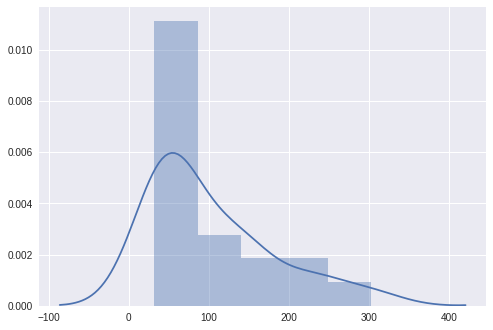

In [6]:
valuelist = []
for v in c.most_common(20):
    if v[1] >= 5:
        valuelist.append(v[1])
        print(v[0], v[1])
    else:
        continue
        #print(v[0])
print(len(valuelist))
print(valuelist)
sns.distplot(valuelist)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. The function:

````python
def makegraph(searchstring, nodefreq, regexp=False, users=True, plot=True)
````

In [6]:
ta.CoreSet.frequency("#bleedthrough", df)

Searching for: #bleedthrough


[('jules', 5),
 ('parsfan', 4),
 ('Traceydix', 3),
 ('Cuboctahedron', 2),
 ('Antihelios', 1),
 ('nilremzo0', 1),
 ('kodemunkey', 1),
 ('IntelVoid', 1),
 ('kerebeth', 1)]

In [38]:
ta.CoreSet.frequencypercent("#letter", df)

Searching for: #letter
Total hashtags: 260


[('Cuboctahedron', 0.5),
 ('parsfan', 0.14),
 ('Traceydix', 0.12),
 ('kodemunkey', 0.1),
 ('fromere', 0.08),
 ('joolslee', 0.02),
 ('Kimnj', 0.01),
 ('Christoferos', 0.01),
 ('bootnecksbs', 0.0),
 ('Mspinelli91', 0.0),
 ('Archi', 0.0),
 ('MoragX', 0.0),
 ('the_interuniversal_geometer', 0.0)]

In [7]:
ta.CoreSet.hashtagtimeseries("#womanwriter", df)['Timestamp']

0    2015-12-10 16:48:16.372
1    2015-12-10 17:51:43.537
2    2015-12-10 18:03:14.555
3    2015-12-10 18:09:08.853
4    2015-12-10 23:28:41.703
5    2015-12-11 16:34:15.917
6    2015-12-11 17:23:19.682
7    2015-12-11 18:29:33.553
8    2015-12-11 20:00:52.875
9    2015-12-13 02:47:33.379
10   2015-12-13 14:06:09.771
11   2015-12-13 14:19:43.119
12   2015-12-14 15:23:51.972
13   2015-12-14 17:04:48.450
14   2015-12-15 09:32:18.498
15   2015-12-15 13:48:17.294
16   2015-12-15 19:53:43.351
17   2015-12-16 14:30:09.570
18   2015-12-16 16:19:27.774
19   2015-12-18 16:51:35.822
20   2015-12-18 22:49:03.204
21   2015-12-18 23:40:12.901
22   2015-12-20 16:24:36.157
23   2015-12-21 13:17:55.799
24   2015-12-21 19:20:17.265
25   2015-12-21 19:34:35.142
26   2015-12-22 18:18:11.706
27   2015-12-22 19:49:03.268
28   2015-12-24 13:02:26.785
29   2015-12-24 14:29:04.819
               ...          
62   2016-02-20 16:22:06.196
63   2016-02-26 15:40:03.017
64   2016-03-04 14:47:31.934
65   2016-03-1

In [8]:
searchterm = "#corlyon"

X = ta.CoreSet.hashtagtimeseries(searchterm, df)['Timestamp']
user = list(range((len(X))))
userlist = ta.CoreSet.hashtagtimeseries(searchterm, df)['User']
factorized = pd.factorize(userlist)
print(factorized[0])
#print(c)

[0 1]


Searching for: #recipe


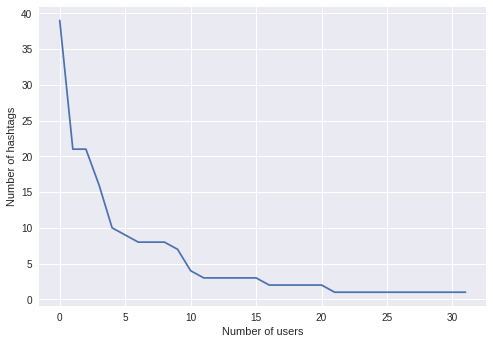

In [9]:
ta.CoreSet.histogram("#recipe", df)

Searching for: #oed


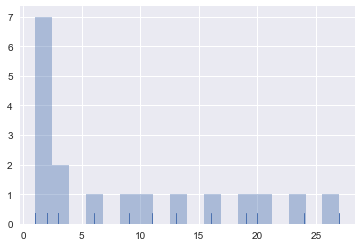

In [43]:
ta.CoreSet.distplot("#oed", df)

Searching for: #womanwriter


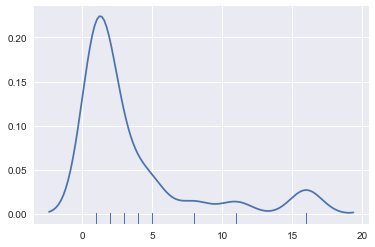

In [44]:
ta.CoreSet.kerneldistplot("#womanwriter", df)

Searching for: #letter


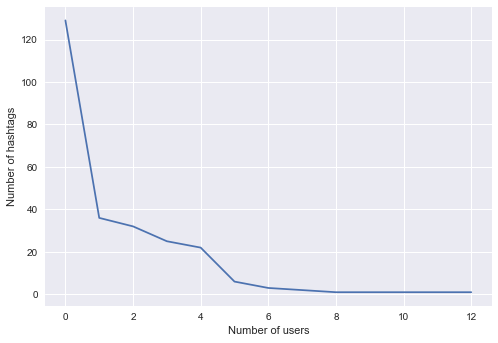

Searching for: #letter


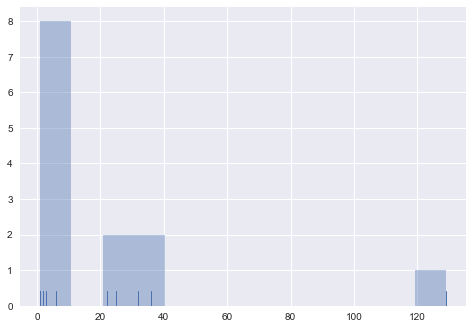

---------------
Searching for: #oed


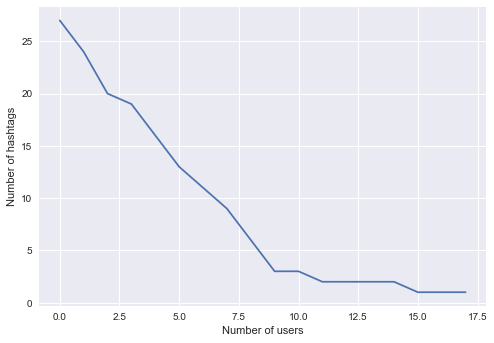

Searching for: #oed


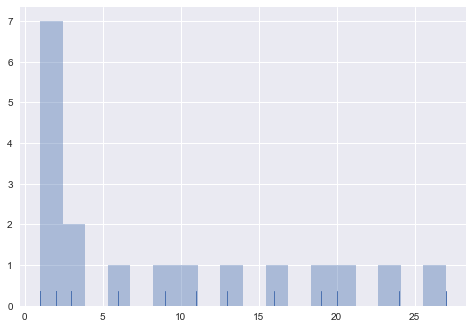

---------------
Searching for: #recipe


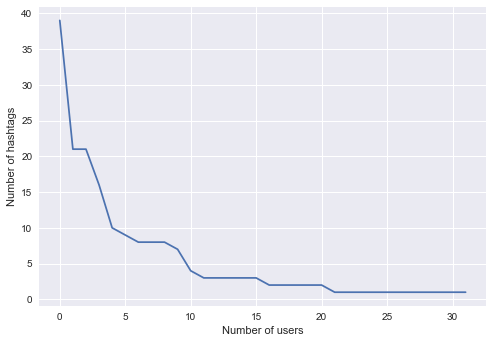

Searching for: #recipe


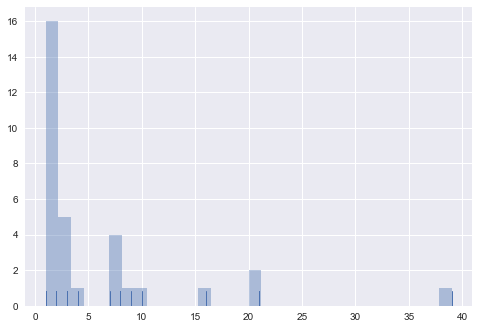

---------------
Searching for: #medicine


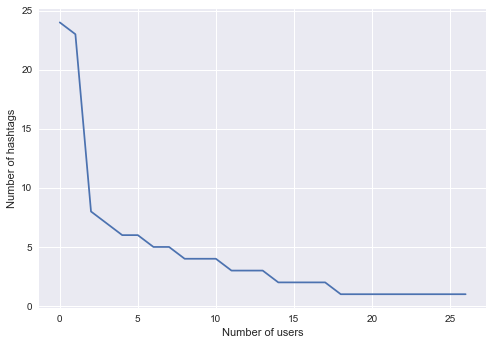

Searching for: #medicine


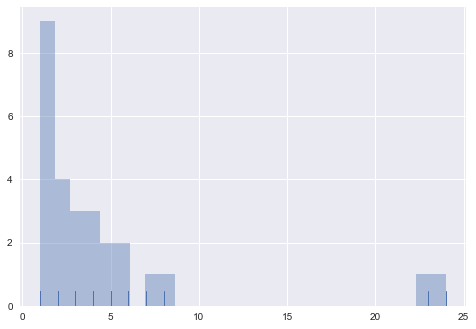

---------------
Searching for: #latin


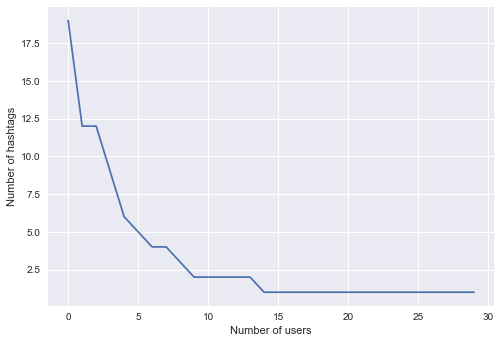

Searching for: #latin


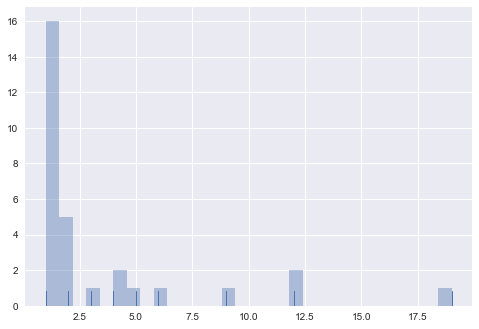

---------------
Searching for: #womanwriter


KeyboardInterrupt: 

In [5]:
'''Print graphs and stuff'''
for hashtag in c.most_common(10):
    ta.CoreSet.histogram(hashtag[0], df)
    ta.CoreSet.distplot(hashtag[0], df)
    print("---------------")

Searching for: #oed
IntelVoid 27
parsfan 24
schub 20
jules 19
mutabilitie 16
VVH 13
Kimnj 11
S_Powell 9
LWSmith 6
Christoferos 3
joyce7b 3
Cuboctahedron 2
Greensleeves 2
Dizzy78 2
ebaldwin 2
elaineleong 1
fromere 1
AndrejGalinac 1
-----
Total value: 162
Ten percentile: 1.0
Twentyfive percentile: 2.0
Fifty percentile: 4.5
Seventyfive percentile: 15.25
Ninety percentile: 21.2
Total users: 18


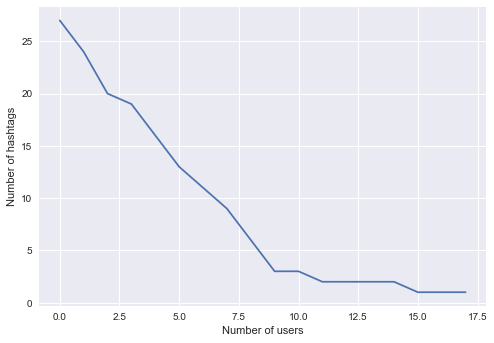

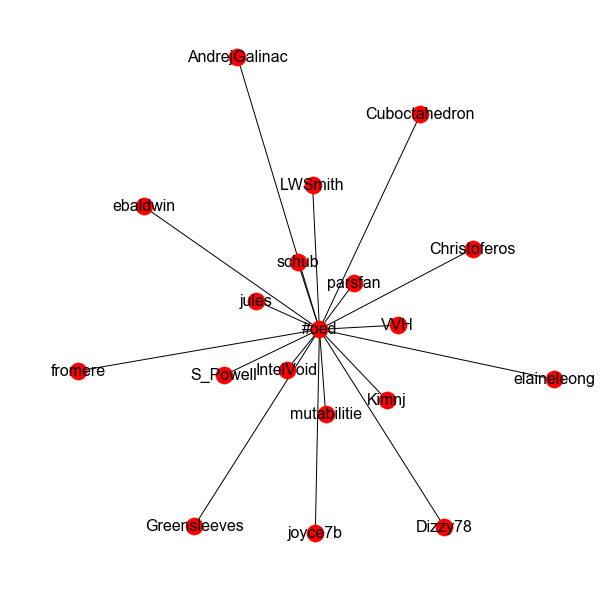

In [30]:
ta.Network.hashtagusernetwork("#oed", df, plot=True, html=False)


In [ ]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)

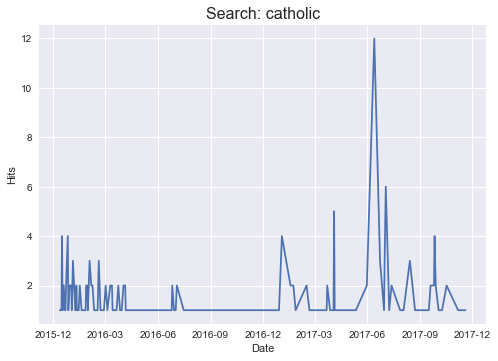

In [29]:
ta.TimeSeries.regexpsearch('catholic', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

In [ ]:
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

In [58]:
ta.Network.hashtaghashtagnetwork("#v", df)

Searching for: #v
-----
Total value: 0


IndexError: cannot do a non-empty take from an empty axes.

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [ ]:
list(range(72))


In [57]:
ta.Network.regexpusernetwork("v", df)

Searching for: v


TypeError: makegraph() got an unexpected keyword argument 'regexp'

In [19]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

Searching for: copyright


[('VVH', 3),
 ('mutabilitie', 2),
 ('jules', 2),
 ('fromere', 1),
 ('ForestPreserve', 1)]

### User/hashtag network
Tracks what hashtag a specific username writes. 

In [ ]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)

In [61]:
ta.Printer.regexpsearch("\#v", df)



Index ID: 746
	0KNuaqjB&sig=oVhtSt5hvzBIoLUuRmV_P_qoktM#v=onepage&q=ambergris%20early%20modern%20
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21231?comment=43975
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//746
Date of post: 2015-12-15 11:51:38


Index ID: 802
	ahUKEwjg--mutN7JAhUHLhoKHaCEA9UQ6AEIIjAA#v=onepage&q=cucumbers%20and%20bartholomew
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21385?comment=44113
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//802
Date of post: 2015-12-15 17:47:01


Index ID: 869
	.co.uk/books?id=234fAAAAYAAJ&q=celandine#v=snippet&q=celandine&f=false) In this ca
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21558?comment=44495
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//869
Date of post: 2015-12-16 16:11:41


Index ID: 933
	ahUKEwjQ1Pr_kePJAhUBlxQKHbpkAiwQ6AEIKTAC#v=o